# Percettrone - Test 2

In [19]:
from sklearn.model_selection import train_test_split
import lib.neuron as neuron
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [2]:
data = pd.read_csv("./data/penguins_size.csv")
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
data["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
data["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [6]:
data["sex"].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [7]:
data[data["species"] == "Chinstrap"].describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,68.000000,68.000000,68.000000,68.000000
mean,48.833824,18.420588,195.823529,3733.088235
std,3.339256,1.135395,7.131894,384.335081
min,40.900000,16.400000,178.000000,2700.000000
25%,46.350000,17.500000,191.000000,3487.500000
50%,49.550000,18.450000,196.000000,3700.000000
75%,51.075000,19.400000,201.000000,3950.000000
max,58.000000,20.800000,212.000000,4800.000000


In [8]:
data[data["species"] == "Gentoo"].describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,123.000000,123.000000,123.000000,123.000000
mean,47.504878,14.982114,217.186992,5076.016260
std,3.081857,0.981220,6.484976,504.116237
min,40.900000,13.100000,203.000000,3950.000000
25%,45.300000,14.200000,212.000000,4700.000000
50%,47.300000,15.000000,216.000000,5000.000000
75%,49.550000,15.700000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


In [9]:
num_data = data[data["species"].isin(["Chinstrap", "Gentoo"])].copy()

s = num_data["species"].dropna().unique()
i = num_data["island"].dropna().unique()
x = num_data["sex"].replace('.', np.nan).dropna().unique()

species = {key: value for value, key in enumerate(s)}
islands = {key: value for value, key in enumerate(i)}
sexes = {key: value for value, key in enumerate(x)}

for kind in species:
    num_data["species"].replace(kind, species[kind], inplace = True)

for island in islands:
    num_data["island"].replace(island, islands[island], inplace = True)

for sex in sexes:
    num_data["sex"].replace(sex, sexes[sex], inplace = True)

num_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
152,0,0,46.5,17.9,192.0,3500.0,0
153,0,0,50.0,19.5,196.0,3900.0,1
154,0,0,51.3,19.2,193.0,3650.0,1
155,0,0,45.4,18.7,188.0,3525.0,0
156,0,0,52.7,19.8,197.0,3725.0,1
...,...,...,...,...,...,...,...
339,1,1,NaN,NaN,NaN,NaN,NaN
340,1,1,46.8,14.3,215.0,4850.0,0
341,1,1,50.4,15.7,222.0,5750.0,1
342,1,1,45.2,14.8,212.0,5200.0,0


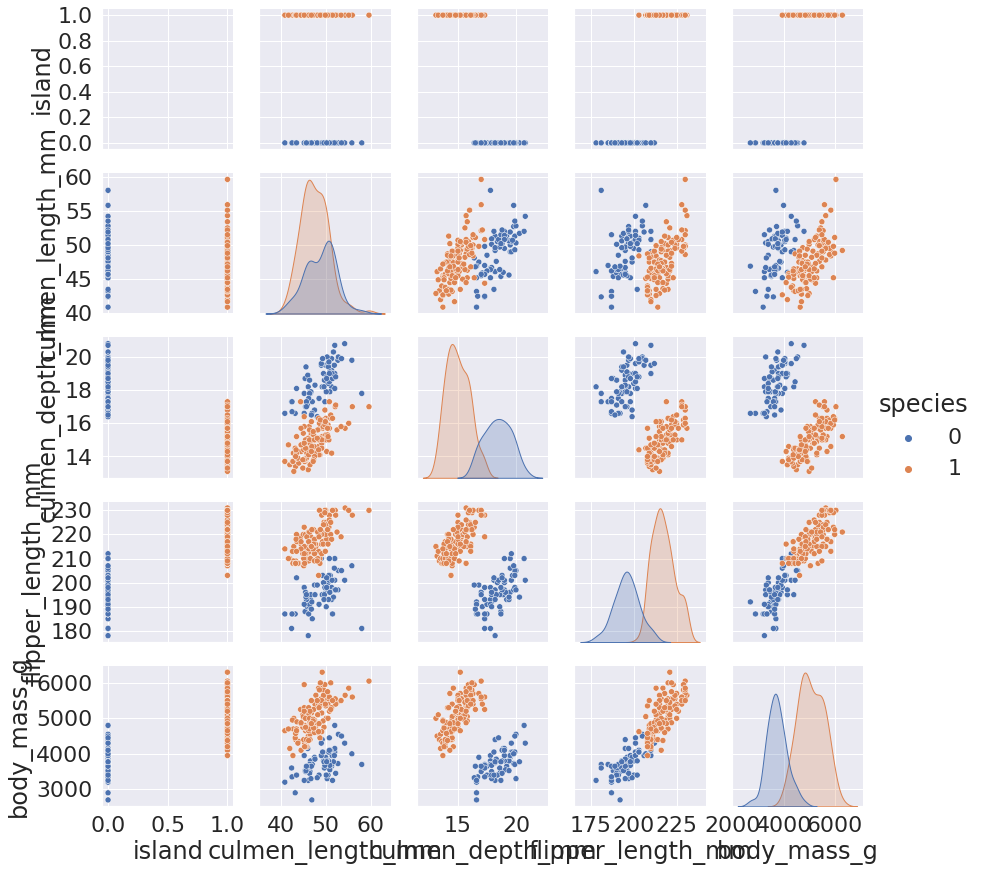

In [10]:
sns.set_theme(font_scale = 2)
sns.pairplot(num_data, hue = "species", dropna = True)
sns.set()

In [11]:
#"culmen_depth_mm", "flipper_length_mm", "body_mass_g"
#"culmen_length_mm", "culmen_depth_mm", "flipper_length_mm"

tmp_data = num_data[["species", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]].copy()
tmp_data.dropna(axis = 'index', inplace = True)

selected_data = pd.DataFrame(tmp_data[["culmen_depth_mm", "flipper_length_mm", "body_mass_g"]])

In [12]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 152 to 343
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_depth_mm    191 non-null    float64
 1   flipper_length_mm  191 non-null    float64
 2   body_mass_g        191 non-null    float64
dtypes: float64(3)
memory usage: 6.0 KB


In [13]:
X_not_norm = selected_data.copy()
X_not_norm

,culmen_depth_mm,flipper_length_mm,body_mass_g
152,17.9,192.0,3500.0
153,19.5,196.0,3900.0
154,19.2,193.0,3650.0
155,18.7,188.0,3525.0
156,19.8,197.0,3725.0
...,...,...,...
338,13.7,214.0,4925.0
340,14.3,215.0,4850.0
341,15.7,222.0,5750.0
342,14.8,212.0,5200.0


In [14]:
y = tmp_data["species"]
y

152    0
153    0
154    0
155    0
156    0
      ..
338    1
340    1
341    1
342    1
343    1
Name: species, Length: 191, dtype: int64

In [15]:
m = X_not_norm.mean()
s = X_not_norm.std()

X = (X_not_norm - m) / s
X

,culmen_depth_mm,flipper_length_mm,body_mass_g
152,0.869116,-1.434879,-1.382219
153,1.690142,-1.108420,-0.878635
154,1.536199,-1.353264,-1.193375
155,1.279629,-1.761337,-1.350745
156,1.844084,-1.026806,-1.098953
...,...,...,...
338,-1.286077,0.360643,0.411798
340,-0.978192,0.442257,0.317376
341,-0.259794,1.013559,1.450440
342,-0.721622,0.197413,0.758012


In [16]:
training_set_X, test_set_X, training_set_y, test_set_y = train_test_split(X, y, train_size = 0.7, random_state = 0)

In [20]:
n = neuron.Neuron(3, 0.17, lambda x: 1 / (1 + np.exp(-x)), lambda x: (1 / (1 + math.exp(-x))) * (1 - (1 / (1 + math.exp(-x)))))
n.fit(training_set_X.values, training_set_y.values, 50000)

In [21]:
input_data = test_set_X.values
expeted_output_data = test_set_y.values

print(n.score(input_data, expeted_output_data))

1.0
